In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
dataset_dir = '/content/images'
csv_file = '/content/faces.csv'

data = pd.read_csv(csv_file)

#Let's look at the csv_file
data.head()

,image_name,width,height,x0,y0,x1,y1
0,00001722.jpg,1333,2000,490,320,687,664
1,00001044.jpg,2000,1333,791,119,1200,436
2,00001050.jpg,667,1000,304,155,407,331
3,00001736.jpg,626,417,147,14,519,303
4,00003121.jpg,626,418,462,60,599,166


[[ 490  320  687  664]
 [ 791  119 1200  436]
 [ 304  155  407  331]
 ...
 [ 258  118  541  303]
 [ 215   11  362  108]
 [ 330    1  487   81]]


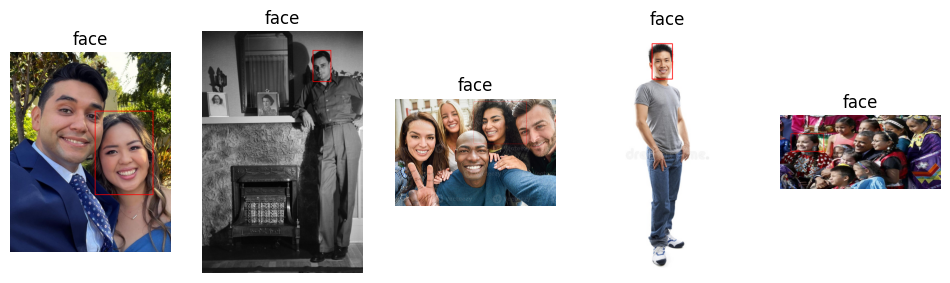

In [ ]:
#Visualize sample images


image_path = data['image_name'].tolist()
bounding_box = data[['x0','y0','x1','y1']].values
print(bounding_box)


num_samples = 5
random_indices = np.random.randint(0, len(image_path), num_samples)
plt.figure(figsize=(12,8))
for i, idx in enumerate(random_indices):
  image = cv2.imread(os.path.join(dataset_dir, image_path[idx]))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  x0, y0, x1, y1 = bounding_box[idx]
  image = cv2.rectangle(image, (int(x0), int(y0)), (int(x1), int(y1)), (255, 0, 0), 2)

  plt.subplot(1, num_samples, i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()

In [ ]:
#analyze bounding boxes coordinate

x_mins, y_mins, x_maxs, y_maxs = bounding_box.T
bounding_box_stats = {
    'x_min_mean': np.mean(x_mins),
    'x_min_std': np.std(x_mins),
    'y_min_mean': np.mean(y_mins),
    'y_min_std': np.std(y_mins),
    'x_max_mean': np.mean(x_maxs),
    'x_max_std': np.std(x_maxs),
    'y_max_mean': np.mean(y_maxs),
    'y_max_std': np.std(y_maxs)
}
print('Bounding Box Statistics:')
for stat, value in bounding_box_stats.items():
    print(f'{stat}: {value}')


Bounding Box Statistics:
x_min_mean: 367.8405970149254
x_min_std: 322.62737754248644
y_min_mean: 152.12089552238805
y_min_std: 171.7181550892559
x_max_mean: 614.4331343283582
x_max_std: 451.7326605125625
y_max_mean: 390.9877611940299
y_max_std: 314.3312087678147


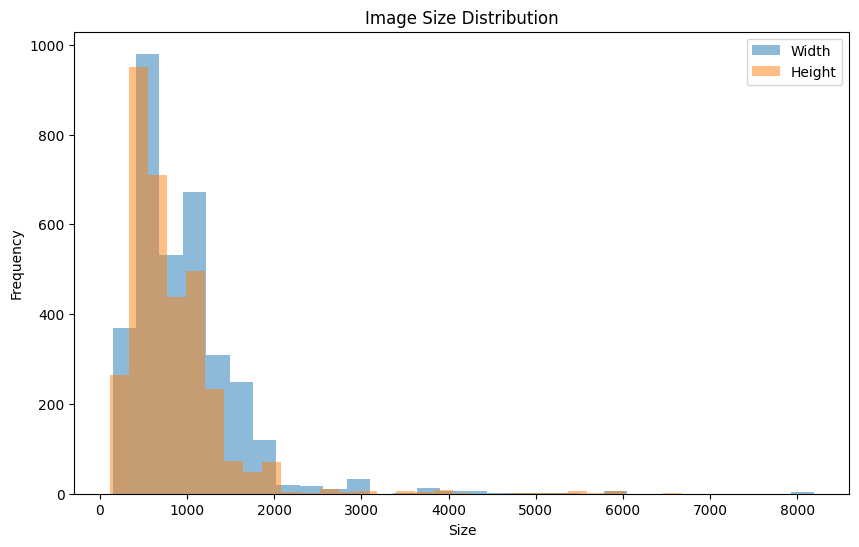

In [ ]:
# Analyze image sizes
image_sizes = data[['width', 'height']].values

widths = image_sizes[:, 0]
heights = image_sizes[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(widths, bins=30, alpha=0.5, label='Width')
plt.hist(heights, bins=30, alpha=0.5, label='Height')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')
plt.legend()
plt.show()